<a href="https://colab.research.google.com/github/Psystar99/Yolov3_train/blob/master/1012_test_bath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/My Drive/10_yolov3/darknet

/content/drive/My Drive/10_yolov3/darknet


In [2]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# 학습 전-원래 욜로 테스트

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

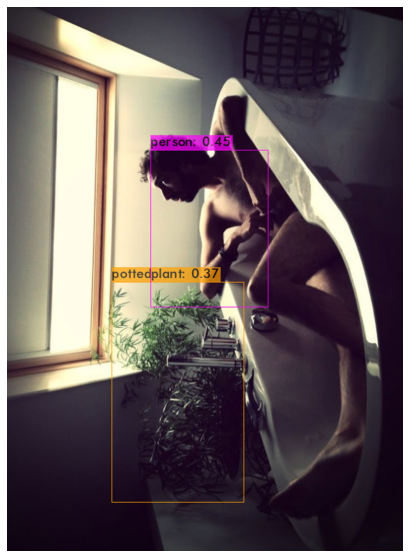

In [21]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/bath_270.png
imShow('predictions.jpg')

## 데이터 다운로드
한 번만 하면 됨


In [9]:
ls

3rdparty/                DarknetConfig.cmake.in  net_cam_v4.sh*
backup/                  darknet_images.py       obj/
bathtub.zip              darknet.py              obj.data
build/                   darknet_video.py        obj.names
build.ps1                data/                   predictions.jpg
build.sh*                generate_train.py       README.md
cfg/                     image_yolov3.sh*        results/
chart.png                image_yolov4.sh*        scripts/
chart_yolov3_custom.png  include/                src/
cmake/                   json_mjpeg_streams.sh*  video_yolov3.sh*
CMakeLists.txt           LICENSE                 video_yolov4.sh*
darknet*                 Makefile                yolov3_custom.cfg
darknet53.conv.74        net_cam_v3.sh*          yolov3.weights


In [10]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip bathtub.zip -d data/

Archive:  bathtub.zip
  inflating: data/Bathtub/037487f1842394fd.txt  
  inflating: data/Bathtub/00514c0fd0a7209a.txt  
  inflating: data/Bathtub/2d2f398e1a658075.txt  
  inflating: data/Bathtub/6592c77bed291158.txt  
  inflating: data/Bathtub/038d8eaa0e6cef0e.txt  
  inflating: data/Bathtub/a5e4d0e8cc491de1.txt  
  inflating: data/Bathtub/2d734f72f183f528.txt  
  inflating: data/Bathtub/9a2f2850b2b6895e.txt  
  inflating: data/Bathtub/1c764f5836fe1ac6.txt  
  inflating: data/Bathtub/0645dcbcf998fed9.txt  
  inflating: data/Bathtub/6b56cf31f3bd83fd.txt  
  inflating: data/Bathtub/ae22d1f0d1d473f0.txt  
  inflating: data/Bathtub/1c091b64463caa8e.txt  
  inflating: data/Bathtub/088bf51ed874d897.txt  
  inflating: data/Bathtub/75b574d234a80d18.txt  
  inflating: data/Bathtub/0ead8e640fa5e475.txt  
  inflating: data/Bathtub/3e9638ec4dd9823f.txt  
  inflating: data/Bathtub/91ef9d06eca04f8b.txt  
  inflating: data/Bathtub/c79dc15122e72384.txt  
  inflating: data/Bathtub/fb6ce479b84287bd.txt 

# 학습시작

In [12]:
ls

3rdparty/                DarknetConfig.cmake.in  obj/
backup_new/              darknet_images.py       obj.data
backup_old/              darknet.py              obj.names
bathtub.zip              darknet_video.py        predictions.jpg
build/                   data/                   README.md
build.ps1                generate_train.py       results/
build.sh*                image_yolov3.sh*        scripts/
cfg/                     image_yolov4.sh*        src/
chart.png                include/                video_yolov3.sh*
chart_yolov3_custom.png  json_mjpeg_streams.sh*  video_yolov4.sh*
cmake/                   LICENSE                 yolov3_custom.cfg
CMakeLists.txt           Makefile                yolov3.weights
darknet*                 net_cam_v3.sh*
darknet53.conv.74        net_cam_v4.sh*


In [32]:
!python generate_train.py

In [18]:
ls

3rdparty/                DarknetConfig.cmake.in  obj/
backup_new/              darknet_images.py       obj.data
backup_old/              darknet.py              obj.names
bathtub.zip              darknet_video.py        predictions.jpg
build/                   data/                   README.md
build.ps1                generate_train.py       results/
build.sh*                image_yolov3.sh*        scripts/
cfg/                     image_yolov4.sh*        src/
chart.png                include/                train.txt
chart_yolov3_custom.png  json_mjpeg_streams.sh*  video_yolov3.sh*
cmake/                   LICENSE                 video_yolov4.sh*
CMakeLists.txt           Makefile                yolov3_custom.cfg
darknet*                 net_cam_v3.sh*          yolov3.weights
darknet53.conv.74        net_cam_v4.sh*


In [ ]:
# train your custom detector
!./darknet detector train obj.data yolov3_custom.cfg darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000008, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 62442, rewritten_bbox = 1.162679 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.823146, GIOU: 0.822928), Class: 0.997909, Obj: 0.378992, No Obj: 0.000849, .5R: 1.000000, .75R: 0.750000, count: 4, class_loss = 0.473521, iou_loss = 0.186257, total_loss = 0.659778 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000008, .5R: 

# 학습 후 테스트

In [6]:
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg

cfg 파일: angle 0으로 설정하고 학습시켰을 때

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 

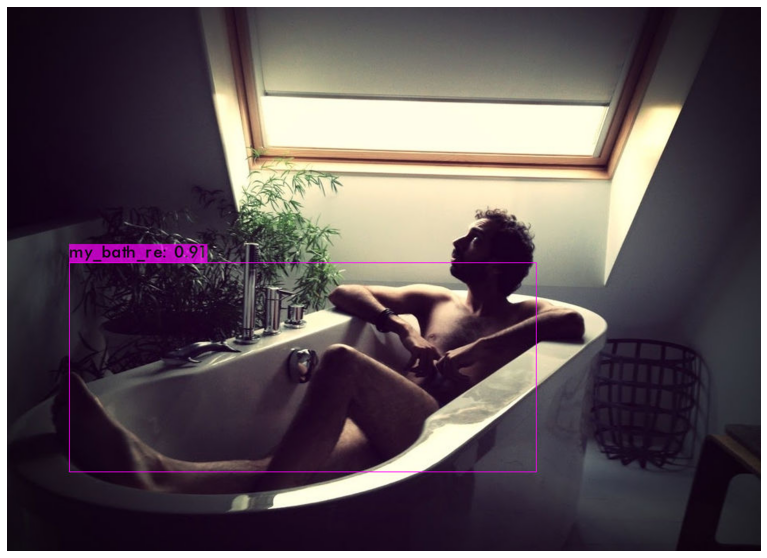

In [7]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test obj.data yolov3_custom.cfg backup_bath/yolov3_custom_last.weights data/bath.png -thresh 0.3
imShow('predictions.jpg')

cfg 파일: angle 90으로 설정하고 학습시켰을 때

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 

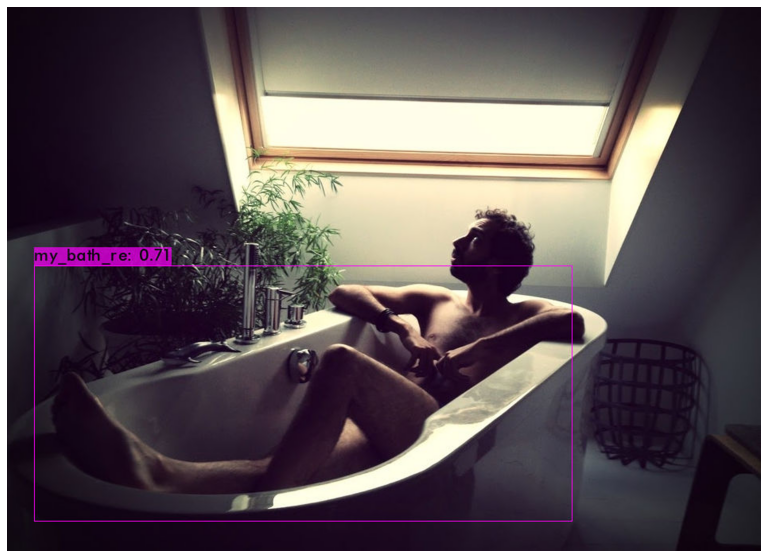

In [8]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test obj.data yolov3_custom.cfg backup_new/yolov3_custom_last.weights data/bath.png -thresh 0.3
imShow('predictions.jpg')